# scRNA-seq of cells from mouse intenstine organoids in Treg-Coculture: Pathway analysis Venn diagrams

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles
import os
import yaml
from IPython.display import Markdown, display

%matplotlib inline

In [2]:
with open('../data/regulated_pathways_cond.yaml', 'r') as file:
    regulated_pathways = yaml.safe_load(file)

In [3]:
comparisons = ['IFNg_IL10_vs_Ctrl', 'Treg_vs_Ctrl', 'Treg_aIFNg_aIL10R_vs_Ctrl']
comparison_labels = ['IFNg + IL10', 'Treg', 'Treg + aIFNg + aIL10R']

## Stem

### Direction of regulation: up

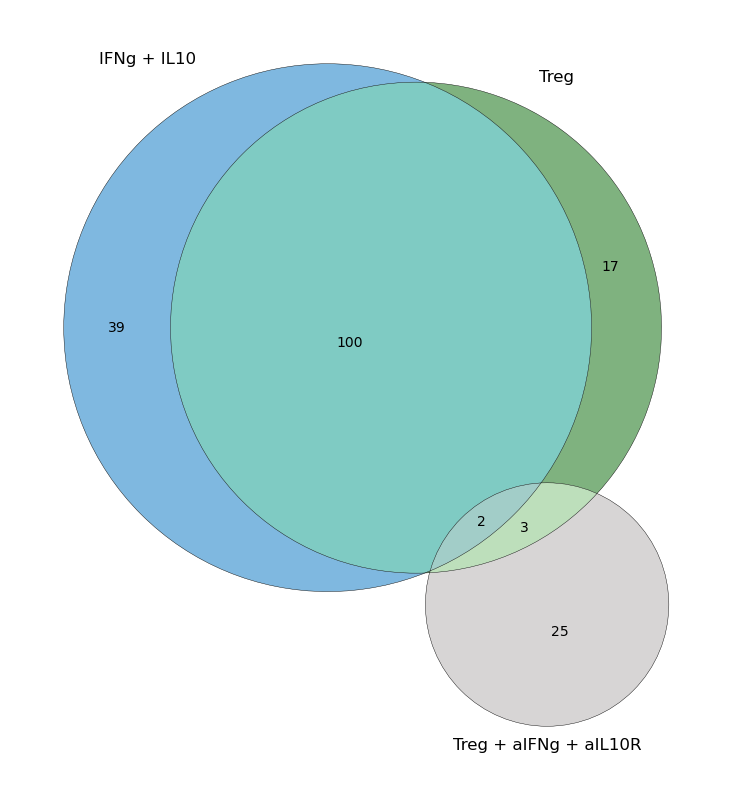

### Direction of regulation: down

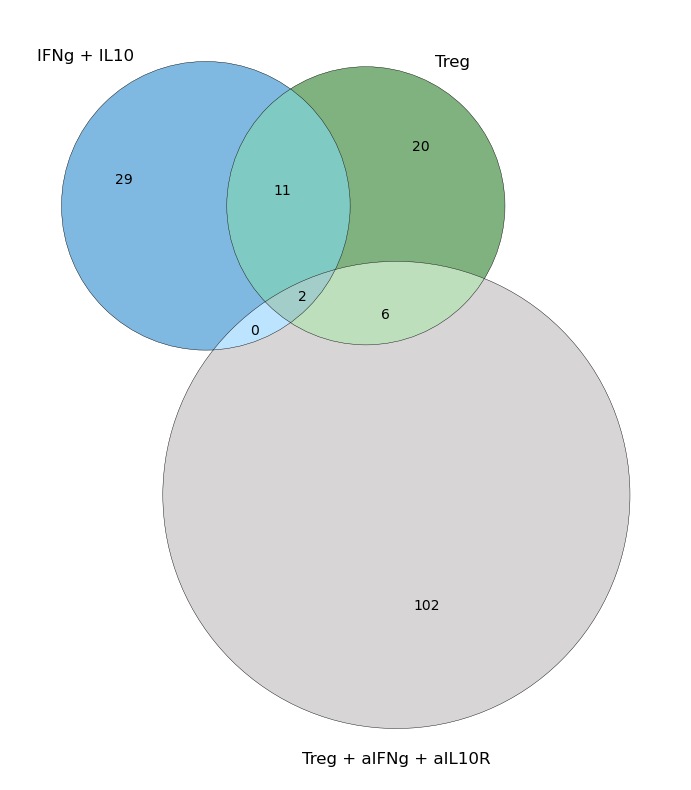

## TA

### Direction of regulation: up

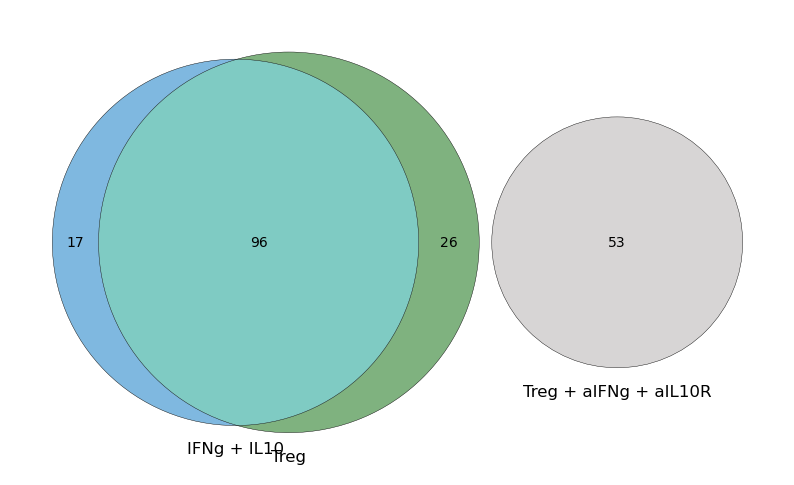

### Direction of regulation: down

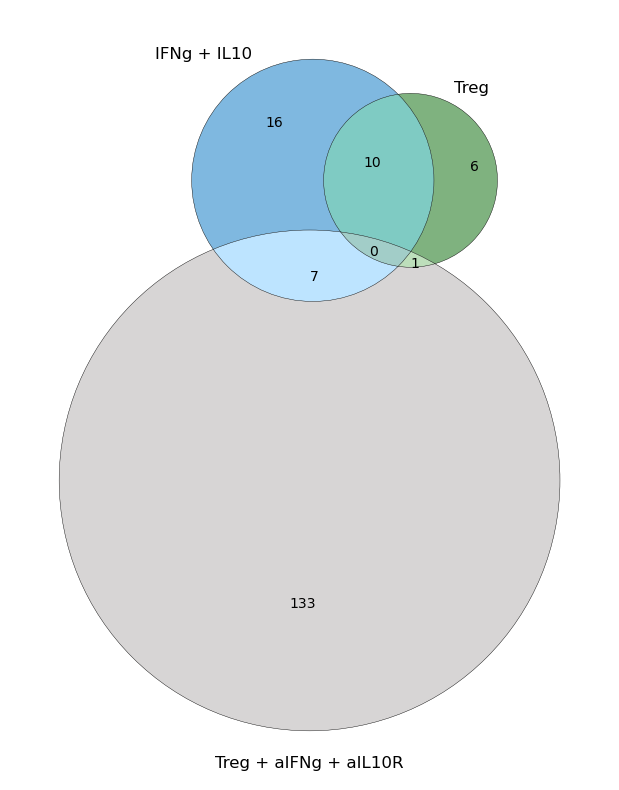

## Enterocyte.Progenitor

### Direction of regulation: up

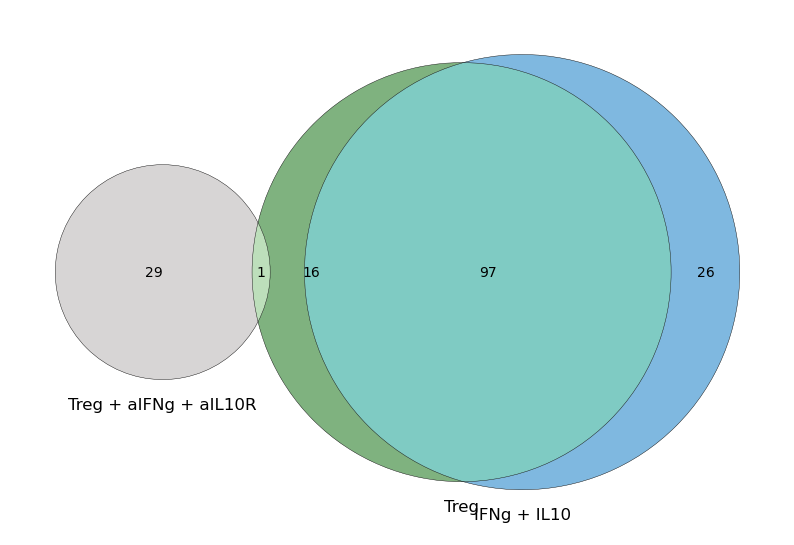

### Direction of regulation: down

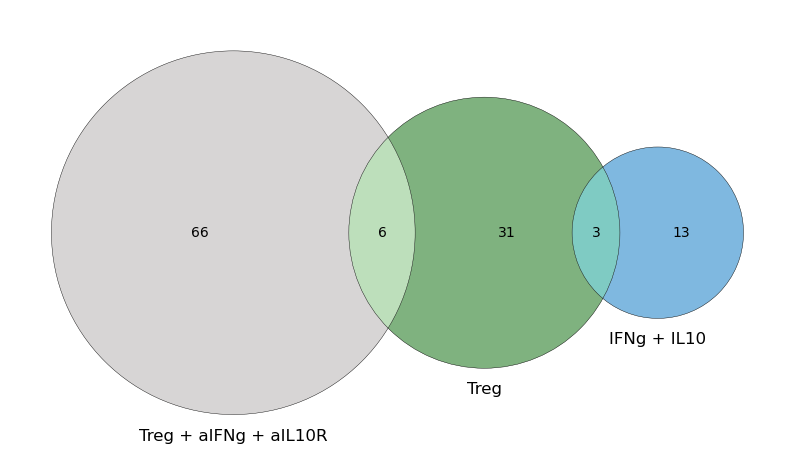

## Enterocyte

### Direction of regulation: up

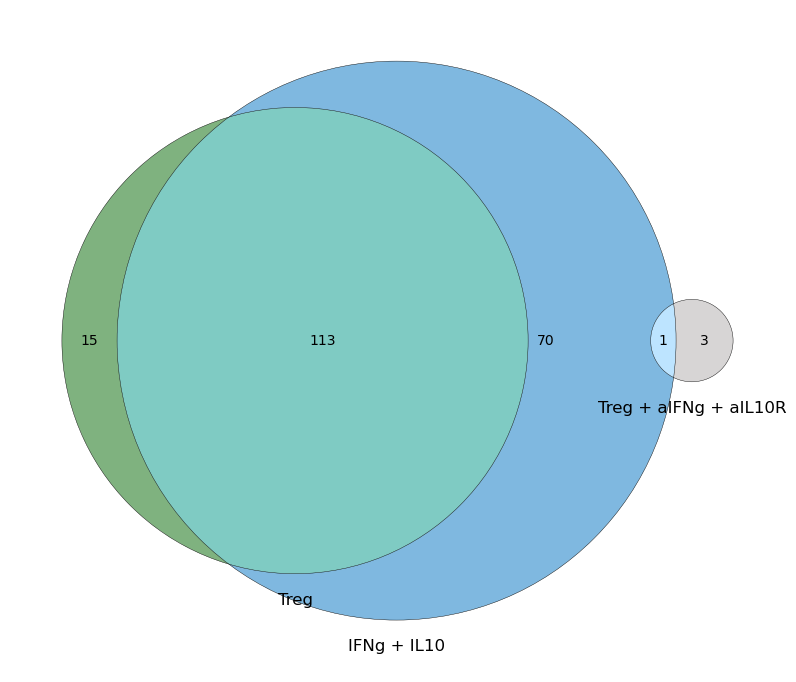

### Direction of regulation: down

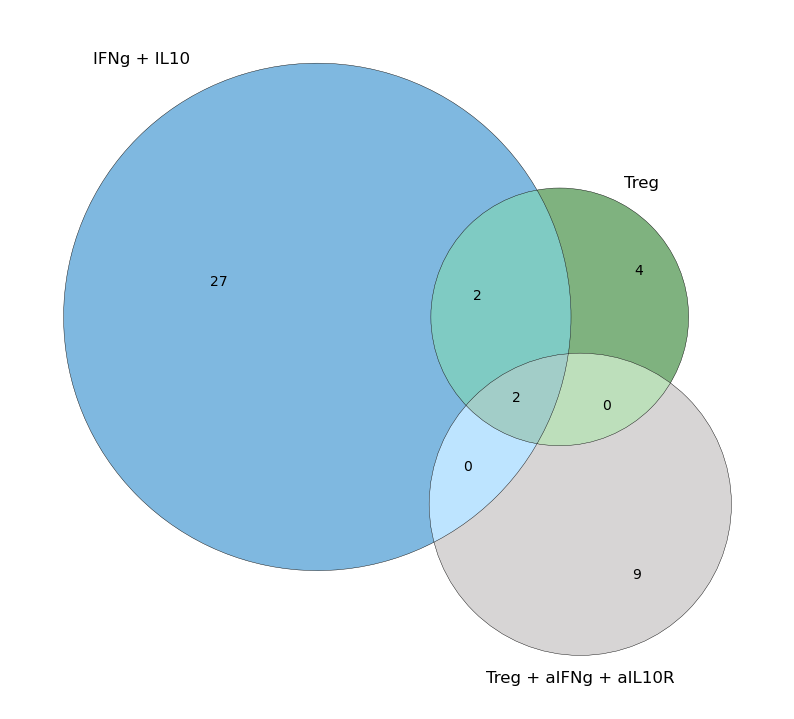

## Endocrine

### Direction of regulation: up

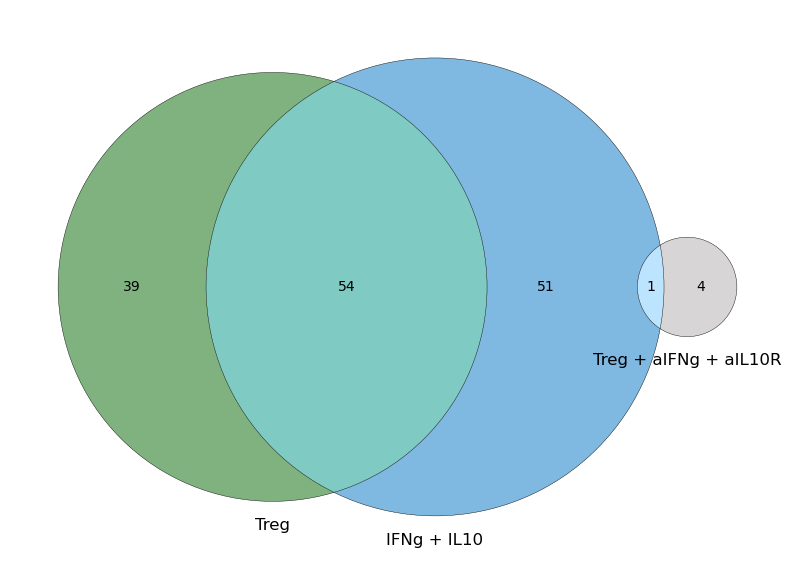

### Direction of regulation: down

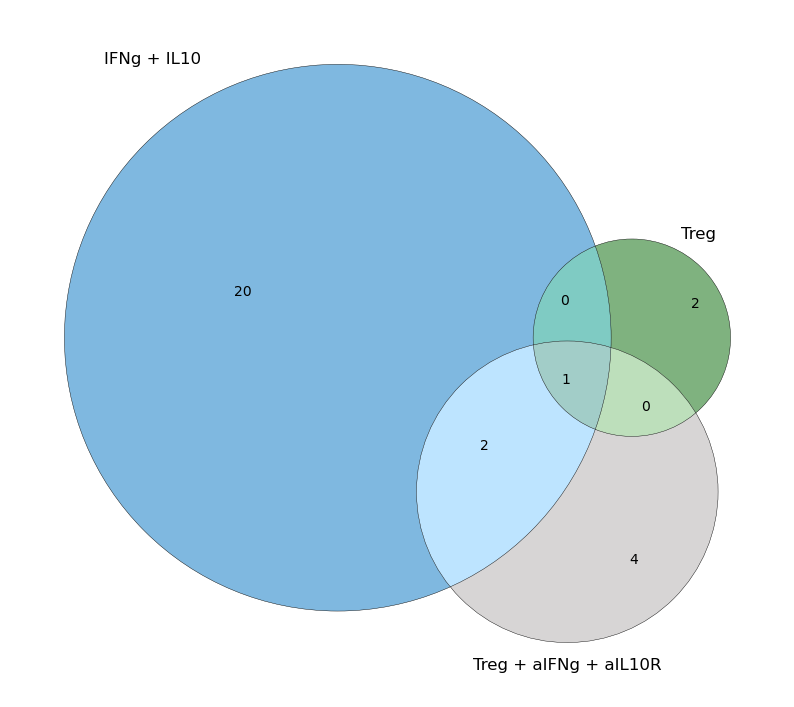

## Goblet.Paneth

### Direction of regulation: up

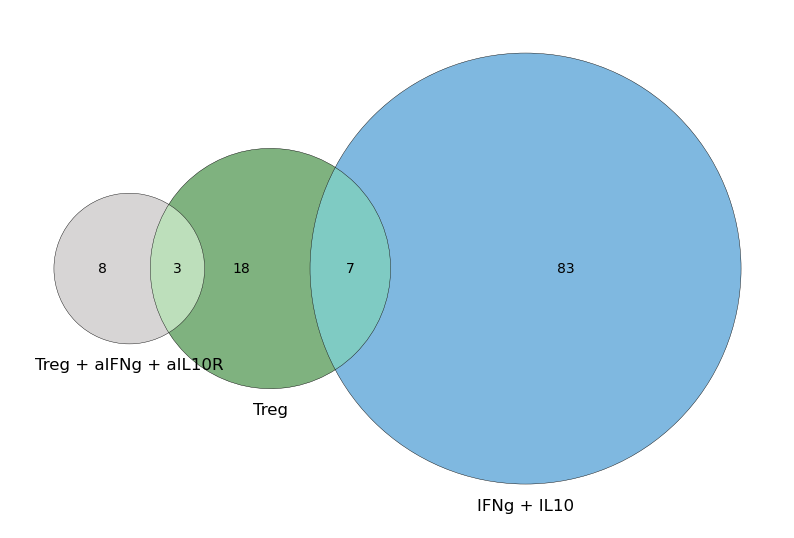

### Direction of regulation: down

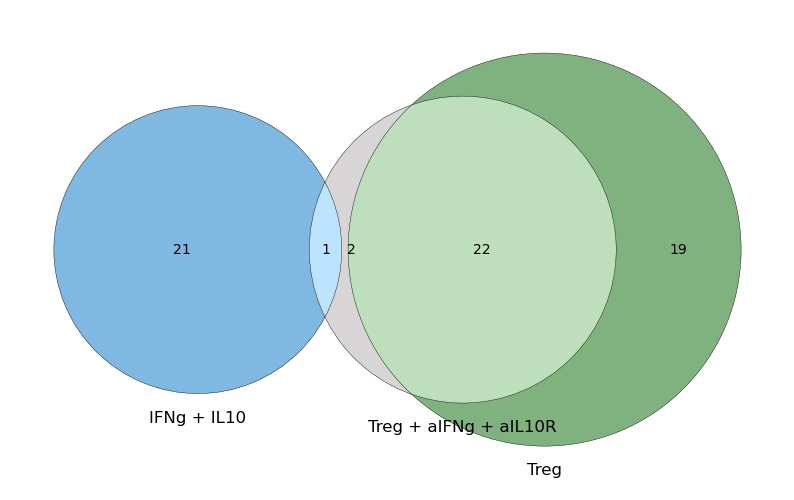

In [4]:
for celltype in regulated_pathways.keys():
    display(Markdown('## ' + celltype))
    for direction in regulated_pathways[celltype].keys():
        display(Markdown('### ' + 'Direction of regulation: ' + direction))
        
        set1 = set(regulated_pathways[celltype][direction][comparisons[0]])
        set2 = set(regulated_pathways[celltype][direction][comparisons[1]])
        set3 = set(regulated_pathways[celltype][direction][comparisons[2]])                                      
                                                           
        plt.figure(figsize=(10, 10))
        v = venn3(
            [set1, set2, set3],
            comparison_labels,
            set_colors = ("#0073C2FF", "#006600", "#b1adadbd"),
            alpha = 0.5
        )
        c = venn3_circles(
            [set1, set2, set3],
            linewidth = 0.3
        )
        #plt.title(celltype + ", " + direction)
        
        plt_name = 'venn3_' + celltype + '-' + direction + '_Treg_aIFNg_aIL10R'
        plt_path = os.path.join('..', 'fig', 'manuscript', 'pathway_venn_diagrams', plt_name)
        
        plt.savefig(plt_path + '.pdf', dpi = 300, format = 'pdf')
        
        plt.show()